# The Witcher 3 Wild Hunt 爬蟲

+ 藥水(https://au.ign.com/wikis/the-witcher-3-wild-hunt/Potions)
+ 劍油(https://au.ign.com/wikis/the-witcher-3-wild-hunt/Oils)
+ 炸彈(https://au.ign.com/wikis/the-witcher-3-wild-hunt/Bombs)

## 過程

1. 引入函式庫

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

2. 宣告 url, header 變數

若不加 header 會產生 403 錯誤

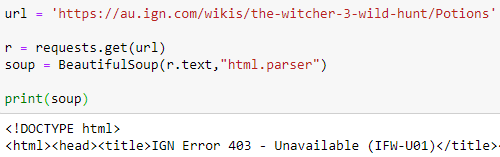

In [2]:
url = 'https://au.ign.com/wikis/the-witcher-3-wild-hunt/Potions'

header = {
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3', 
    'Accept-Encoding': 'gzip, deflate, br', 
    'Accept-Language': 'zh-TW,zh;q=0.9,en-US;q=0.8,en;q=0.7', 
    'Cache-Control': 'max-age=0', 
    'Connection': 'keep-alive', 
    'DNT': '1', 
    'Host': 'au.ign.com', 
    'If-None-Match': "71a77-78QQZ7VQ44i6O13fTF262bTmwMo", 
    'Sec-Fetch-Mode': 'navigate', 
    'Sec-Fetch-Site': 'same-origin', 
    'Upgrade-Insecure-Requests': '1', 
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.108 Safari/537.36', 
}

3. 發出 request 並附上 header

In [3]:
r = requests.get(url, headers=header)

4. 使用 BeautifulSoup 分析

In [4]:
soup = BeautifulSoup(r.text,"html.parser")

5. 宣告放爬取資料的 list

In [5]:
title = [] #欄位標題
item_name = [] # 名稱
effect = [] # 效果
location = [] # 地點

6. 抓取 html 元素以需要的資料

In [6]:
table = soup.select("table > tbody")[0]
tr = table.select("tr")

7. 將資料放入剛剛宣告的 list 裡

In [7]:
for t in tr[0]:
    title.append(t.text.strip())

for row in tr[1:]:
    fields = row.find_all("td")
    item_name.append(fields[0].text.strip())
    effect.append(fields[1].text.strip())
    location.append(fields[2].text.strip())

8. 將 list 放入 DataFrame 裡

In [8]:
potions_df = pd.DataFrame({title[0]:item_name, title[1]:effect, title[2]:location})

9. 印出 DataFrame 查看結果

In [9]:
potions_df

,Item Name,Effect,Location
0,Alghoul Decoction,Adrenaline Points are generated more quickly t...,"Read the book Ghouls and Alghouls, sold by the..."
1,Ancient Leshen Decoction,Each Sign cast increases Stamina regeneration ...,In a chest in the river northwest of the Woeso...
2,Arachas Decoction,Reduces damage received based on armor and inv...,Sold by Herbalist in Novigrad
3,Archgriffin Decoction,"If any Stamine is available, strong attacks co...",Randomly found in treasure chests
4,Basilisk Decoction,Applies a buff increasing the intensity of a r...,"In the Abandoned Tower in Velen, west of Heath..."
...,...,...,...
63,Enhanced White Raffard's Decoction,Immediately restores a great amount of Vitality,Sold by the Halfling Herbalist in Novigrad
64,Superior White Raffard's Decoction,Restores Vitality immediately and fully. Grant...,Sold by the Halfling Herbalist east of Oxenfur...
65,Wolven Hour,Temporarily lowers the required level of all i...,Starting potion (added via patch update)
66,Wraith Decoction,Whenever a single hit drains more than a third...,Sold by Herbalist at Refugees' Camp in Velen a...


10. 輸出 csv 檔

設定 index=0，把 DataFrame 的序號拿掉

In [10]:
potions_df.to_csv('Potions.csv', index=0) #輸出 csv

## 爬取藥水的資料

In [11]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = 'https://au.ign.com/wikis/the-witcher-3-wild-hunt/Potions'

header = {
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3', 
    'Accept-Encoding': 'gzip, deflate, br', 
    'Accept-Language': 'zh-TW,zh;q=0.9,en-US;q=0.8,en;q=0.7', 
    'Cache-Control': 'max-age=0', 
    'Connection': 'keep-alive', 
    'DNT': '1', 
    'Host': 'au.ign.com', 
    'If-None-Match': "71a77-78QQZ7VQ44i6O13fTF262bTmwMo", 
    'Sec-Fetch-Mode': 'navigate', 
    'Sec-Fetch-Site': 'same-origin', 
    'Upgrade-Insecure-Requests': '1', 
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.108 Safari/537.36', 
}

r = requests.get(url, headers=header)
soup = BeautifulSoup(r.text,"html.parser")

title = [] #欄位標題
item_name = [] # 名稱
effect = [] # 效果
location = [] # 地點

table = soup.select("table > tbody")[0]
tr = table.select("tr")

for t in tr[0]:
    title.append(t.text.strip())

for row in tr[1:]:
    fields = row.find_all("td")
    item_name.append(fields[0].text.strip())
    effect.append(fields[1].text.strip())
    location.append(fields[2].text.strip())

potions_df = pd.DataFrame({title[0]:item_name, title[1]:effect, title[2]:location})

potions_df.to_csv('Potions.csv', index=0) #輸出 csv

potions_df

,Item Name,Effect,Location
0,Alghoul Decoction,Adrenaline Points are generated more quickly t...,"Read the book Ghouls and Alghouls, sold by the..."
1,Ancient Leshen Decoction,Each Sign cast increases Stamina regeneration ...,In a chest in the river northwest of the Woeso...
2,Arachas Decoction,Reduces damage received based on armor and inv...,Sold by Herbalist in Novigrad
3,Archgriffin Decoction,"If any Stamine is available, strong attacks co...",Randomly found in treasure chests
4,Basilisk Decoction,Applies a buff increasing the intensity of a r...,"In the Abandoned Tower in Velen, west of Heath..."
...,...,...,...
63,Enhanced White Raffard's Decoction,Immediately restores a great amount of Vitality,Sold by the Halfling Herbalist in Novigrad
64,Superior White Raffard's Decoction,Restores Vitality immediately and fully. Grant...,Sold by the Halfling Herbalist east of Oxenfur...
65,Wolven Hour,Temporarily lowers the required level of all i...,Starting potion (added via patch update)
66,Wraith Decoction,Whenever a single hit drains more than a third...,Sold by Herbalist at Refugees' Camp in Velen a...


## 爬取劍油的資料

In [12]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = 'https://au.ign.com/wikis/the-witcher-3-wild-hunt/Oils'

header = {
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3', 
    'Accept-Encoding': 'gzip, deflate, br', 
    'Accept-Language': 'zh-TW,zh;q=0.9,en-US;q=0.8,en;q=0.7', 
    'Cache-Control': 'max-age=0', 
    'Connection': 'keep-alive', 
    'DNT': '1', 
    'Host': 'au.ign.com', 
    'If-None-Match': "71a77-78QQZ7VQ44i6O13fTF262bTmwMo", 
    'Sec-Fetch-Mode': 'navigate', 
    'Sec-Fetch-Site': 'same-origin', 
    'Upgrade-Insecure-Requests': '1', 
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.108 Safari/537.36', 
}

r = requests.get(url, headers=header)
soup = BeautifulSoup(r.text,"html.parser")

title = [] #欄位標題
item_name = [] # 名稱
effect = [] # 效果
location = [] # 地點

table = soup.select("table > tbody")[0]
tr = table.select("tr")

for t in tr[0]:
    title.append(t.text.strip())

for row in tr[1:]:
    fields = row.find_all("td")
    item_name.append(fields[0].text.strip())
    effect.append(fields[1].text.strip())
    location.append(fields[2].text.strip())

oils_df = pd.DataFrame({title[0]:item_name, title[1]:effect, title[2]:location})

oils_df.to_csv('Oils.csv', index=0) #輸出 csv

oils_df

,Name,Effect,Location
0,Beast Oil,10% Additional attack power against Beasts. Ha...,Sold by Keira Metz outside of Midcopse in Vele...
1,Enhanced Beast Oil,25% Additional attack power against Beasts. Ha...,Found in a cave south of Lindenvale in Velen o...
2,Superior Beast Oil,50% Additional attack power against Beasts. Ha...,Found on a small island south of Fyke Isle in ...
3,Cursed Oil,10% Additional attack power against Cursed One...,Found in a Hidden Treasue south of Duen Hen in...
4,Enhanced Cursed Oil,25% Additional attack damage against Cursed On...,Sold at the Herbalist's Hut in Velen
5,Superior Cursed Oil,50% Additional attack power against Cursed One...,Found during the Now or Never quest in the se...
6,Draconid Oil,10% Additional attack power against Draconids....,Sold by Keria Metz outside of Midcopse in Velen
7,Enhanced Draconid Oil,25% Additional attack power against Draconids....,Sold by the Herbalist in Rannveig in Ard Skellig
8,Superior Draconid Oil,50% Additional attack power against Draconids....,"Behind a rubble wall (use Aard) in a marked ""C..."
9,Elementa Oil,10% Additional attack power against Elementa. ...,Sold by Keira Metz outside of Midcopse in Velen


## 爬取炸彈的資料

In [13]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = 'https://au.ign.com/wikis/the-witcher-3-wild-hunt/Bombs'

header = {
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3', 
    'Accept-Encoding': 'gzip, deflate, br', 
    'Accept-Language': 'zh-TW,zh;q=0.9,en-US;q=0.8,en;q=0.7', 
    'Cache-Control': 'max-age=0', 
    'Connection': 'keep-alive', 
    'DNT': '1', 
    'Host': 'au.ign.com', 
    'If-None-Match': "71a77-78QQZ7VQ44i6O13fTF262bTmwMo", 
    'Sec-Fetch-Mode': 'navigate', 
    'Sec-Fetch-Site': 'same-origin', 
    'Upgrade-Insecure-Requests': '1', 
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.108 Safari/537.36', 
}

r = requests.get(url, headers=header)
soup = BeautifulSoup(r.text,"html.parser")

title = [] #欄位標題
item_name = [] # 名稱
effect = [] # 效果
location = [] # 地點

table = soup.select("table > tbody")[0]
tr = table.select("tr")

for t in tr[0]:
    title.append(t.text.strip())

for row in tr[1:]:
    fields = row.find_all("td")
    item_name.append(fields[0].text.strip())
    effect.append(fields[1].text.strip())
    location.append(fields[2].text.strip())

bombs_df = pd.DataFrame({title[0]:item_name, title[1]:effect, title[2]:location})

bombs_df.to_csv('Bombs.csv', index=0) #輸出 csv

bombs_df

,Name,Effect,Location
0,Dancing Star,Produces bomb that does +100 fire damage for 4...,Harpy Feeding Ground in Velen or sold at the H...
1,Enhanced Dancing Star,Produces bomb that does +100 fire damage for 7...,Harpy Feeding Ground in Velen or sold by the H...
2,Superior Dancing Star,Produces bomb that does +100 fire damage for 1...,Sold by Gremist in Skellige
3,Devil's Puffball,Releases a cloud of posion for +100 damage for...,Sold by the Herbalist in the northeast hut out...
4,Enhanced Devil's Puffball,Releases a cloud of poison for +100 damage for...,Sold by the Herbalist in Kaer Trolde Harbor in...
5,Superior Devil's Puffball,Releases a cloud of poison for +100 damage for...,Sold by Gremist in Skellige
6,Dimertium Bomb,Blocks magic and monsters' magic abilities for...,Sold by the Blacksmith in Hierarch Square in N...
7,Enhanced Dimertium Bomb,Blocks magic and monster's magic abilities for...,Sold by the Herbalist in Kaer Trolde Harbor in...
8,Superior Dimertium Bomb,Blocks magis and monster's magic abilities for...,Sold by Gremist in Skellige
9,Dragon's Dream,Releases a cloud of gas that explodes when ign...,Sold at the Herbalist's Hut in Novigrad


## 優化

In [15]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

target = ['Potions', 'Oils', 'Bombs']

original_url = 'https://au.ign.com/wikis/the-witcher-3-wild-hunt/'

header = {
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3', 
    'Accept-Encoding': 'gzip, deflate, br', 
    'Accept-Language': 'zh-TW,zh;q=0.9,en-US;q=0.8,en;q=0.7', 
    'Cache-Control': 'max-age=0', 
    'Connection': 'keep-alive', 
    'DNT': '1', 
    'Host': 'au.ign.com', 
    'If-None-Match': "71a77-78QQZ7VQ44i6O13fTF262bTmwMo", 
    'Sec-Fetch-Mode': 'navigate', 
    'Sec-Fetch-Site': 'same-origin', 
    'Upgrade-Insecure-Requests': '1', 
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.108 Safari/537.36', 
}

def get_data(soup):
    title = [] #欄位標題
    item_name = [] # 名稱
    effect = [] # 效果
    location = [] # 地點
    
    table = soup.select("table > tbody")[0].select("tr")
    
    for t in table[0]:
        title.append(t.text.strip())

    for row in table[1:]:
        fields = row.find_all("td")
        item_name.append(fields[0].text.strip())
        effect.append(fields[1].text.strip())
        location.append(fields[2].text.strip())
        
    df = pd.DataFrame({title[0]:item_name, title[1]:effect, title[2]:location})
    
    return df

for item in target:
    url = original_url + item

    r = requests.get(url, headers=header)
    soup = BeautifulSoup(r.text,"html.parser")
    
    df = get_data(soup)
    df #印出結果
    
    filename = item + ".csv"
    df.to_csv(filename, index=0) #輸出 csv